In [106]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [107]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [108]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [109]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [110]:
# reflect an existing database into a new model
base = automap_base()
base.prepare(engine, reflect=True)

# reflect the tables


In [111]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [112]:
# Save references to each table - remember the table names and create a variable to save an instance of the table class and use it
Measurement = base.classes.measurement
Station = base.classes.station


In [113]:
# Create our session (link) from Python to the DB - 
# Link Python to the database by creating an SQLAlchemy session
session = Session(engine)

In [114]:
from sqlalchemy import inspect

# Exploratory Precipitation Analysis

In [115]:
#Inspect/get/see/check what are the table names in the dataset
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [116]:
#bringout the column names of each table
columns = inspector.get_columns('measurement')

In [117]:
#use pandas to show dataset in the DataFrame format
df_columns_measurement = pd.DataFrame(columns)

In [118]:
#show df_columns_measurement
df_columns_measurement

,name,type,nullable,default,autoincrement,primary_key
0,id,INTEGER,False,None,auto,1
1,station,TEXT,True,None,auto,0
2,date,TEXT,True,None,auto,0
3,prcp,FLOAT,True,None,auto,0
4,tobs,FLOAT,True,None,auto,0


In [119]:
Station = inspector.get_columns('station')

In [120]:
#use pandas to show dataset in the DataFrame format
df_columns_station = pd.DataFrame(Station)

In [121]:
#show df_columns_station
df_columns_station

,name,type,nullable,default,autoincrement,primary_key
0,id,INTEGER,False,None,auto,1
1,station,TEXT,True,None,auto,0
2,name,TEXT,True,None,auto,0
3,latitude,FLOAT,True,None,auto,0
4,longitude,FLOAT,True,None,auto,0
5,elevation,FLOAT,True,None,auto,0


In [122]:
#another way to view the column names, use inspector to print the column names
columns_measurement = inspector.get_columns('measurement')
for column in columns_measurement:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [123]:
#another way to view the column names, use inspector to print the column names
columns_station = inspector.get_columns('station')
for column in columns_station:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [124]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

In [125]:
#Calculate the date 1 year ago from the last data point in the databse
one_yr_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print (one_yr_ago)

2016-08-23


In [126]:
#write a query to retrieve the data and precipitation data within the last 12 months
one_yr_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23', Measurement.date <= '2017-08-23').\
    order_by(Measurement.date).all()
one_yr_data

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [127]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df_one_yr_data = pd.DataFrame(one_yr_data, columns = ['date', 'precipitation'])
df_one_yr_data

,date,precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [128]:
# Sort the dataframe by date
df_one_yr_data.set_index('date')
df_one_yr_data.head()

,date,precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


<function matplotlib.pyplot.show(close=None, block=None)>

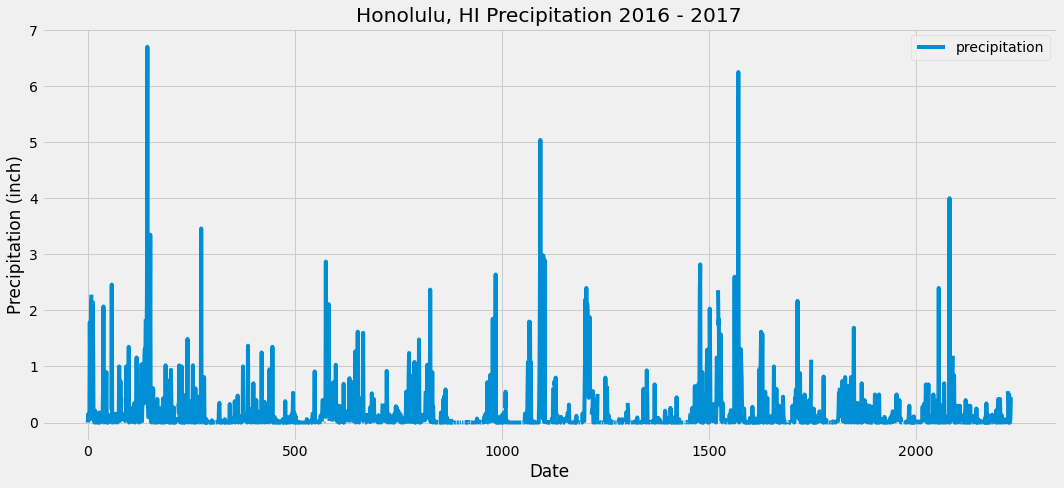

In [129]:
# Use Pandas Plotting with Matplotlib to plot the data
# Plot Data
fig, ax = plt.subplots(figsize = (15, 7))
df_one_yr_data.plot(ax = ax, x_compat = True)

#Set Title & Labels
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (inch)')
ax.set_title("Honolulu, HI Precipitation 2016 - 2017")

#Save fig
plt.savefig("Images/precipitation.png")

#plot figure
plt.tight_layout()
plt.show

In [130]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_one_yr_data.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [134]:
# Design a query to calculate the total number stations in the dataset
Total_stations = session.query(func.count(Station.station)).all()
Total_stations

AttributeError: 'list' object has no attribute 'station'

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()